In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import time
import sklearn
from random import random
import numpy as np
import pandas as pd

In [3]:
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# ARP -NB

In [4]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

In [5]:
cols=feature_list["ARP"]

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
loop1='./csvs/mitm-arpspoofing-6-dec.pcap_Flow.csv'

In [21]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [22]:
loop1='./csvs/kitsune_ARP.csv'

In [33]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [34]:
features=cols[0:-1]

In [24]:
model =GaussianNB(var_smoothing=1e-09  )
model.fit(X_train,y_train)

GaussianNB()

In [25]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 447 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [26]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/225 [00:00<?, ?it/s]

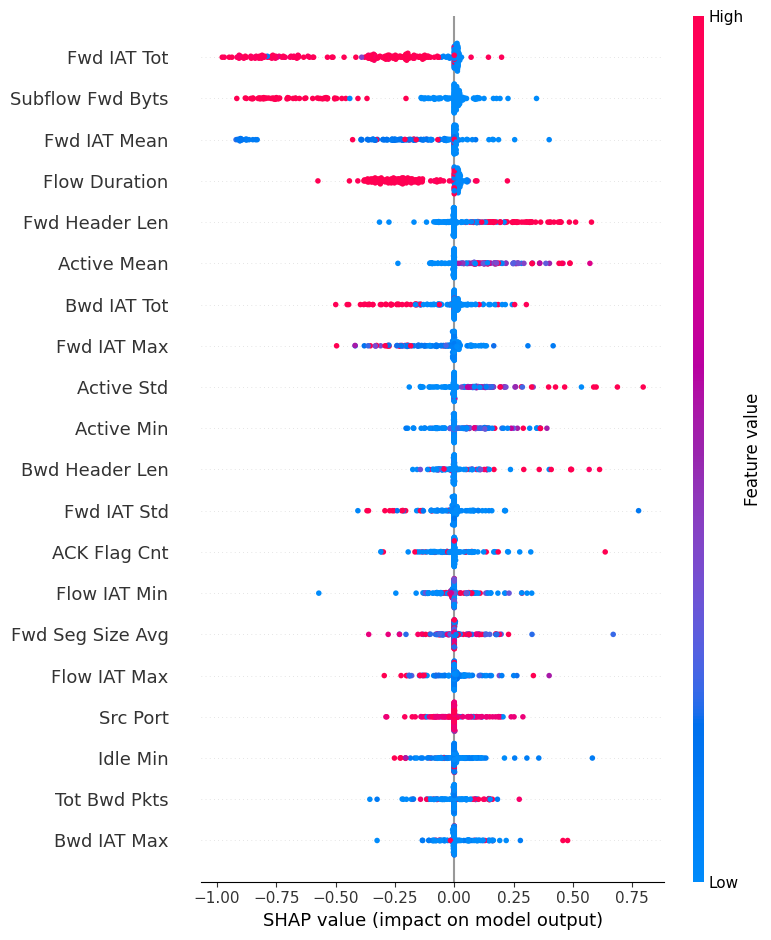

In [29]:
shap.summary_plot(shap_values,X_test,feature_names=features)

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

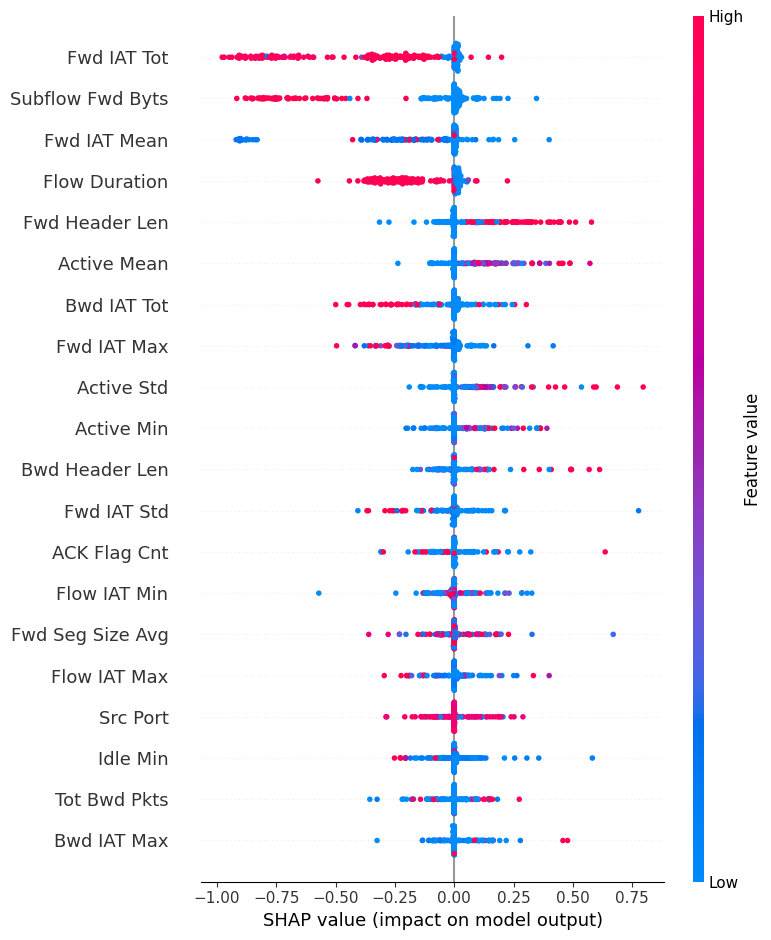

In [32]:
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-ARP-NB.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# ARP - MLP

In [36]:
from sklearn.neural_network import MLPClassifier

In [37]:
model =MLPClassifier(solver= 'sgd', learning_rate= 'adaptive', hidden_layer_sizes= (1637, ), alpha= 0.0001, activation='tanh')  
model.fit(X_train,y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(1637,),
              learning_rate='adaptive', solver='sgd')

In [38]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 447 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [39]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/225 [00:00<?, ?it/s]

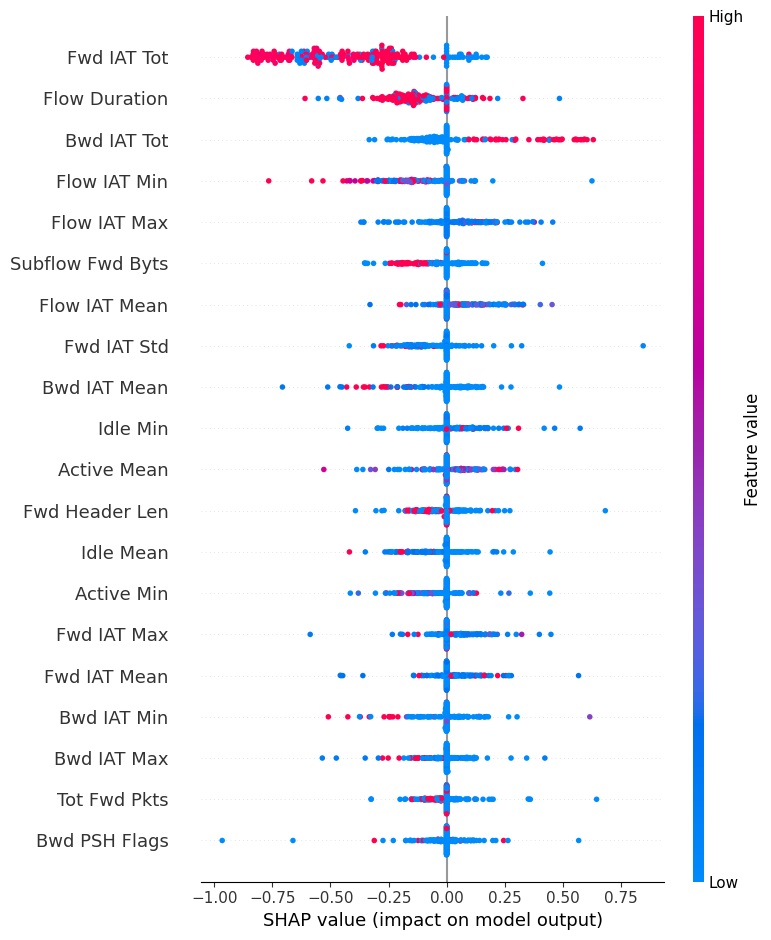

In [40]:
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-ARP-MLP.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# BF -NB

In [6]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

In [11]:
cols=feature_list["BF"]

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
loop1= './csvs/mirai-hostbruteforce-5-dec.pcap_Flow.csv'

In [14]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [15]:
loop1='./csvs/AmcrestCamBruteForce_1.pcap_Flow.csv'

In [16]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [17]:
features=cols[0:-1]

In [18]:
model =GaussianNB(var_smoothing=1e-09  )
model.fit(X_train,y_train)

GaussianNB()

In [19]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 984 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [20]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/67 [00:00<?, ?it/s]

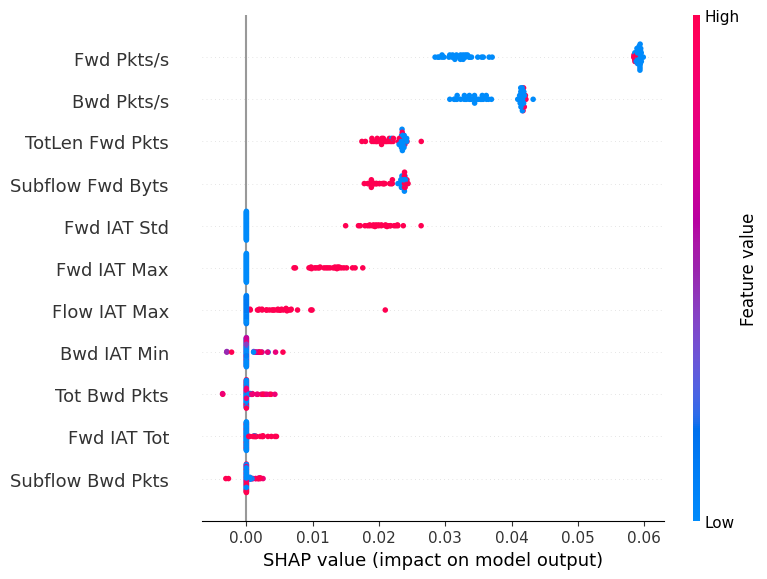

In [21]:
shap.summary_plot(shap_values,X_test,feature_names=features)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

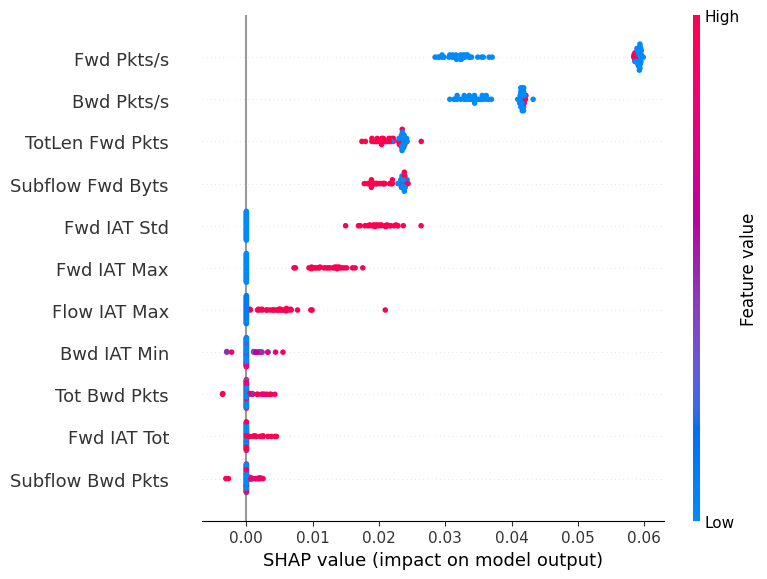

In [23]:
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-BF-NB.pdf', format='pdf', dpi=1200, bbox_inches='tight')

# HTTP - NB

In [65]:
import json
with open('GA_output_ET.json', 'r') as fp:
    feature_list = json.load(fp)

In [66]:
cols=feature_list["HTTP"]

In [67]:
from sklearn.naive_bayes import GaussianNB

In [68]:
loop1= './csvs/mirai-httpflooding-4-dec.pcap_Flow.csv'

In [69]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
#df=df.sample(n=1000,  random_state=1)
X_train =df[df.columns[0:-1]]
X_train=np.array(X_train)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_train=df[df.columns[-1]].cat.codes  

In [70]:
loop1='./csvs/NetatmoCamHTTPFlood_1.pcap_Flow.csv'

In [71]:
df = pd.read_csv(loop1,usecols=cols)#,header=None )
df=df.fillna(0)
df=df.sample(n=10000,  random_state=1)
X_test =df[df.columns[0:-1]]
X_test=np.array(X_test)
df[df.columns[-1]] = df[df.columns[-1]].astype('category')
y_test=df[df.columns[-1]].cat.codes  

In [72]:
features=cols[0:-1]

In [73]:
model =GaussianNB(var_smoothing=1e-09  )
model.fit(X_train,y_train)

GaussianNB()

In [74]:
explainer = shap.KernelExplainer(model.predict,X_train)

Using 1840 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [75]:
shap_values = explainer.shap_values(X_test,nsamples=100)

  0%|          | 0/10000 [00:00<?, ?it/s]

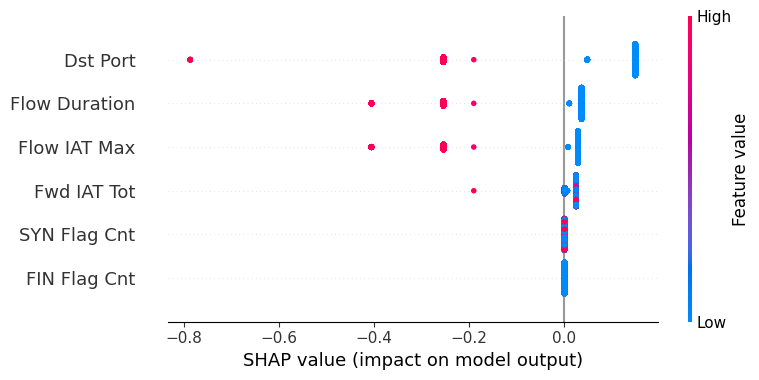

In [76]:
shap.summary_plot(shap_values,X_test,feature_names=features)

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

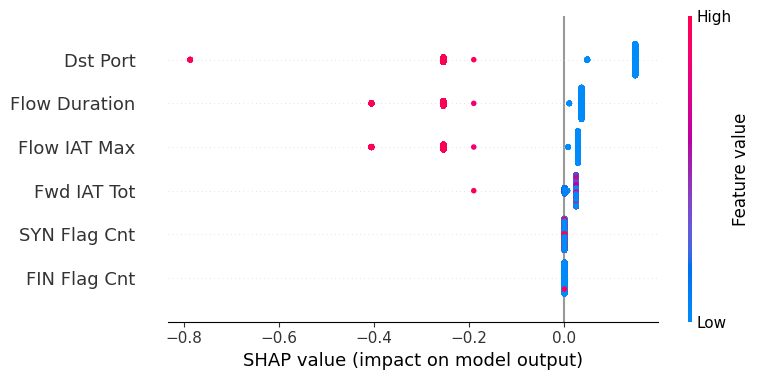

In [78]:
shap.summary_plot(shap_values,X_test,feature_names=features, show=False)
plt.savefig(f'F-HTTP-NB.pdf', format='pdf', dpi=1200, bbox_inches='tight')

In [79]:
#!Shutdown /s -t 300